In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
# impoting the libraries


In [158]:
petrol_data=pd.read_csv(r"C:\Users\purnn\Downloads\petrol.csv")

In [159]:
petrol_data.head(5)

,city,date,rate,state
0,Hyderabad,2011-12-01,73.07,Telangana
1,Hyderabad,2012-04-01,73.08,Telangana
2,Hyderabad,2012-05-24,81.44,Telangana
3,Hyderabad,2012-06-03,78.11,Telangana
4,Hyderabad,2012-06-29,74.89,Telangana


In [160]:
petrol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    5048 non-null   object 
 1   date    5048 non-null   object 
 2   rate    5048 non-null   float64
 3   state   5048 non-null   object 
dtypes: float64(1), object(3)
memory usage: 157.9+ KB


In [161]:
petrol_data["city"].value_counts()

city
Mumbai       1035
Chennai      1031
Delhi        1029
Hyderabad     978
Bengaluru     975
Name: count, dtype: int64

<Axes: xlabel='city'>

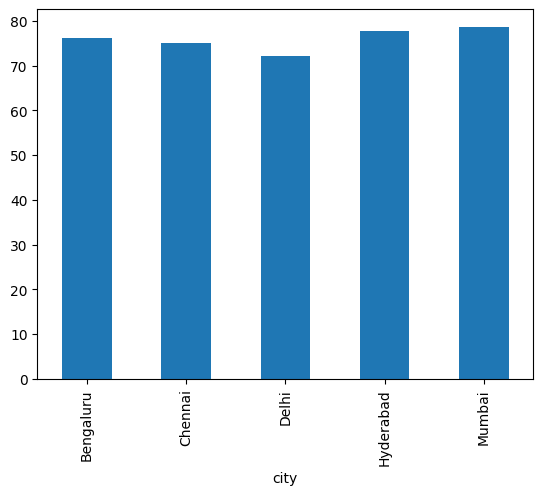

In [162]:
petrol_data.groupby(["city"])["rate"].mean().plot(kind="bar")

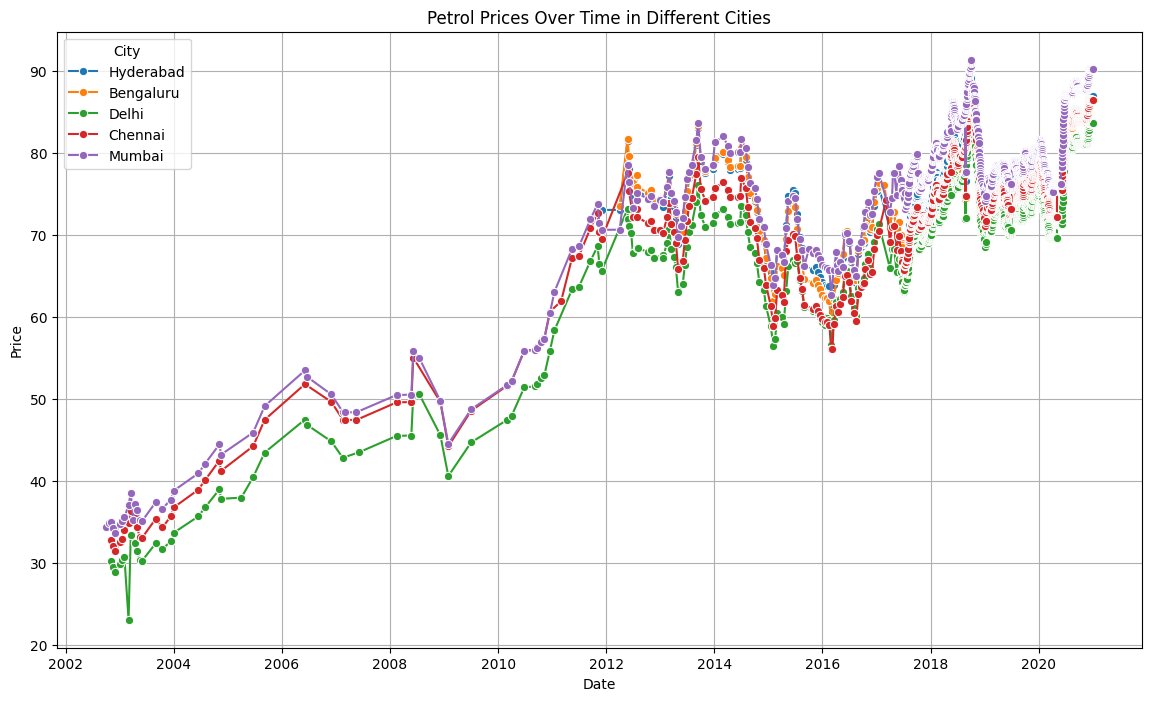

In [163]:
import pandas as pd
petrol_data['date'] = pd.to_datetime(petrol_data['date'])

# Plotting the data
plt.figure(figsize=(14, 8))
sns.lineplot(data=petrol_data, x='date', y='rate', hue='city', marker='o')

plt.title('Petrol Prices Over Time in Different Cities')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='City')
plt.grid(True)
plt.show()

In [164]:
petrol_data.replace({"city":{"Hyderabad":4,"Delhi":1,"Mumbai":5,"Chennai":2,"Bengaluru":3}},inplace=True)

C:\Users\purnn\AppData\Local\Temp\ipykernel_4264\4029873871.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  petrol_data.replace({"city":{"Hyderabad":4,"Delhi":1,"Mumbai":5,"Chennai":2,"Bengaluru":3}},inplace=True)


In [165]:
petrol_data["state"].value_counts()

state
Maharashtra    1035
Tamil Nadu     1031
Delhi          1029
Telangana       978
Karnataka       975
Name: count, dtype: int64

In [166]:
petrol_data.drop("state",inplace=True,axis=1)

In [167]:
petrol_data.head()

,city,date,rate
0,4,2011-12-01,73.07
1,4,2012-04-01,73.08
2,4,2012-05-24,81.44
3,4,2012-06-03,78.11
4,4,2012-06-29,74.89


In [168]:
type(petrol_data["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [169]:
petrol_data["date"]=petrol_data["date"].astype("string")

In [170]:
petrol_data["date"][0][-2:]

'01'

In [171]:
def split(str):
    return str[0:4]

In [172]:
petrol_data["year"]=petrol_data["date"].apply(split)

In [173]:
petrol_data.head()

,city,date,rate,year
0,4,2011-12-01,73.07,2011
1,4,2012-04-01,73.08,2012
2,4,2012-05-24,81.44,2012
3,4,2012-06-03,78.11,2012
4,4,2012-06-29,74.89,2012


In [174]:
def splits(str):
    return str[5:7]

In [175]:
petrol_data["month"]=petrol_data["date"].apply(splits)

In [176]:
petrol_data.head(5)

,city,date,rate,year,month
0,4,2011-12-01,73.07,2011,12
1,4,2012-04-01,73.08,2012,04
2,4,2012-05-24,81.44,2012,05
3,4,2012-06-03,78.11,2012,06
4,4,2012-06-29,74.89,2012,06


In [177]:
petrol_data.drop("date",axis=1,inplace=True)

In [178]:
petrol_data.head(5)

,city,rate,year,month
0,4,73.07,2011,12
1,4,73.08,2012,04
2,4,81.44,2012,05
3,4,78.11,2012,06
4,4,74.89,2012,06


In [179]:
petrol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    5048 non-null   int64  
 1   rate    5048 non-null   float64
 2   year    5048 non-null   object 
 3   month   5048 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 157.9+ KB


In [180]:
petrol_data["year"]=petrol_data["year"].astype(int)

In [181]:
petrol_data["month"]=petrol_data["month"].astype(int)

In [182]:
petrol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    5048 non-null   int64  
 1   rate    5048 non-null   float64
 2   year    5048 non-null   int32  
 3   month   5048 non-null   int32  
dtypes: float64(1), int32(2), int64(1)
memory usage: 118.4 KB


In [183]:
x=petrol_data.drop("rate",axis=1)

In [184]:
y=petrol_data["rate"]

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [187]:
from sklearn.ensemble import RandomForestRegressor

In [188]:
rf=RandomForestRegressor()

In [189]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [190]:
y_predictions=rf.predict(x_test)

In [191]:
print(y_predictions)

[72.25107    71.96610713 72.76231999 ... 68.14393833 67.38961448
 84.85359196]


In [192]:
from sklearn.metrics import mean_squared_error

In [193]:
print(mean_squared_error(y_predictions,y_test))

1.6529036021977423


In [194]:
def predict_petrol_price(city,year,month,model):
    res=[]
    res.append(city)
    res.append(year)
    res.append(month)
    res_array=np.asarray(res)
    res_array_reshaped=res_array.reshape(1,-1)
    ans=model.predict(res_array_reshaped)
    print("The price of petrol is",ans[0])

In [195]:
predict_petrol_price(4,2011,9,rf)

The price of petrol is 76.39091666666667


C:\Users\purnn\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [196]:
from sklearn.linear_model import LinearRegression

In [197]:
lr=LinearRegression()

In [198]:
lr.fit(x_train,y_train)

LinearRegression()

In [199]:
predict_petrol_price(4,2020,9,rf)

The price of petrol is 84.85359196087806


C:\Users\purnn\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [200]:
predict_petrol_price(4,2009,9,rf)

The price of petrol is 49.696300000000036


C:\Users\purnn\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [203]:
import gradio as gr
from sklearn.ensemble import RandomForestRegressor
import numpy as np

model = RandomForestRegressor()
model.fit(x_train, y_train)  # Fit the model with your training data

def predict_petrol_price(city, year, month):
    # Prepare input for prediction
    res = [city, year, month]
    res_array = np.asarray(res)
    res_array_reshaped = res_array.reshape(1, -1)
    
    # Example of model prediction
    ans = model.predict(res_array_reshaped)
    
    return ans[0]

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_petrol_price,
    inputs=["text", "text", "text"],
    outputs="text",
    title="Petrol Price Predictor",
    description="Enter the city code, year, and month to predict the petrol price."
)

# Launch the interface
iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\Users\purnn\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
